In [5]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import sys
import time
sys.path.insert(0,'../..')
import omama as O
from skimage import data
from skimage import transform
from skimage.color import rgb2gray
from skimage.feature import match_descriptors, plot_matches, SIFT

In [7]:
imgs = O.DataHelper.get2D(N=10, config_num=2)

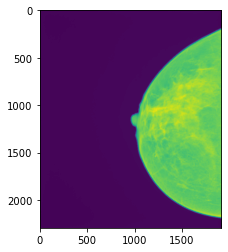

In [8]:
plt.imshow(imgs[1].pixels)

TypeError: Invalid shape (1, 256, 256) for image data

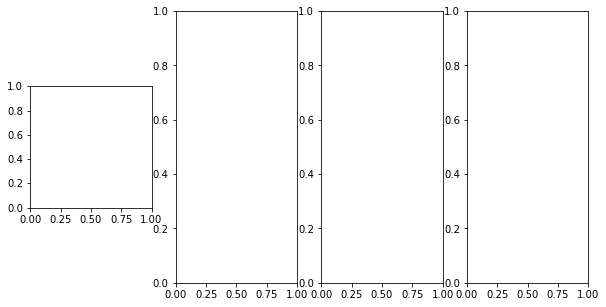

In [9]:
for img in imgs:
    O.Features.show_image_and_feature(img, feature_types=['hist', 'sift', 'orb'], downsample=True, output_shape=(256,256))

In [9]:
norm = O.Normalize.minmax(imgs[0].pixels)

In [10]:
# setting when testing initial mammogram
descriptor_extractor = SIFT(n_scales=1,      # good at 1, if 2 or 4 will take forever to run next method
                            n_octaves=1,     # good at 1, if 2 or above keypoints start to take over the whole image
                            upsampling=1,    # good at 1, 
                            sigma_min=1.5,
                            sigma_in=.5,
                            c_edge=.05, 
                            c_dog=.7, 
                            n_bins=10,        # n_bins >= 6 or will cause error
                            lambda_ori=.5,
                            c_max=1.5,
                            lambda_descr=.5,
                            n_hist=1,
                            n_ori=1
                           )

In [11]:
descriptor_extractor.detect_and_extract(norm)

In [12]:
keypoints = descriptor_extractor.keypoints
descriptors = descriptor_extractor.descriptors

In [13]:
print(len(keypoints))

168


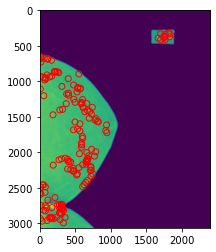

In [14]:
im = plt.imshow(norm)
x_points = keypoints[:,1]
y_points = keypoints[:,0]
plt.scatter(x_points, y_points, facecolors='none', edgecolors='r')
plt.show()

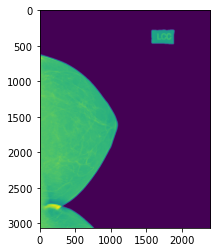

In [15]:
plt.imshow(imgs[0].pixels)

In [16]:
pixels = imgs[0].pixels

In [17]:
norm[keypoints[0,1], keypoints[0,0]]

180.52382

In [20]:
imgs[0].pixels[keypoints[0,1], keypoints[0,0]]

2899

In [30]:
intensities = []
for kp in keypoints:
    print(norm[kp[0], kp[1]])

143.90843
144.4066
145.7143
144.28206
166.26375
142.66301
146.02565
168.63004
142.78755
143.41026
146.02565
188.36996
187.49817
175.85349
174.23444
174.04762
174.04762
193.53847
169.75092
196.46521
183.326
194.16118
190.73627
167.94505
185.38095
161.96704
176.28938
192.10623
182.39195
187.31136
181.95605
179.46521
199.82784
191.60806
193.16484
178.96704
177.9707
188.43224
163.7729
170.68498
198.83151
181.89378
181.08426
190.42491
185.13187
192.72894
203.93773
180.64836
182.70331
180.46155
188.05861
173.17583
181.45789
190.79854
196.02931
192.1685
188.99268
174.85715
193.60074
186.87546
192.1685
183.7619
165.70331
179.21613
196.34067
192.6044
181.45789
194.16118
174.67033
170.0
193.4762
185.38095
162.52748
189.30403
190.36264
183.82417
183.57509
183.07693
191.98169
191.04762
188.05861
183.57509
188.80586
186.1282
189.67766
191.1099
191.2967
171.24542
178.09525
186.93773
193.41393
195.34433
171.18315
190.98535
200.45055
167.50916
166.63737
195.90477
200.26373
169.1282
193.28938
188.05861

In [32]:
print(keypoints[:,1]) # x points

[1811 1702 1834 1768 1752 1759 1828 1753 1667 1767 1701   10   15   65
  109  113  113    9  167   17  207  226  248  208  268  551  102  167
   14  137   47   73   87  401   73  477  312  535  573  537    8  571
  525  404  379  406   56  479  604  498  596  582  664  373  588  609
  741  614  322  282  674  704  635  728  187  697  793  780  812  826
  497  566  941  533  476  929  566  945  601  604  587  589  589  730
  788  663  560  689  771  360  673  307  678  394  271  672  666  400
  654  663  414  437  660  653  603  190  720  719  551  472  392  436
  724  472  714  480  529  745  521  722  674  647  624   40   52  604
   79   13   75    7   17  215  115  309  254  278  307   18   77  309
  299  171   99  283  316  284  307  323   56  334   80  286  279  300
  305  239  140  357  172  159  141  172    9  191  287  105   33  333]


In [31]:
print(keypoints[:,0]) # y points

[ 318  329  329  337  359  371  371  382  391  408  414  656  658  673
  681  683  683  684  702  726  860  862  865  872  877  895  908  927
  929  937  944  948  960  961  979 1051 1070 1085 1097 1097 1106 1105
 1149 1165 1177 1195 1202 1251 1255 1295 1297 1305 1312 1314 1318 1357
 1365 1371 1394 1402 1413 1421 1427 1460 1470 1519 1524 1546 1562 1570
 1571 1597 1614 1670 1682 1692 1697 1722 1776 1802 1870 1893 1926 1957
 1991 2002 2018 2047 2052 2080 2084 2090 2092 2099 2104 2103 2117 2125
 2125 2125 2129 2135 2141 2166 2174 2179 2200 2211 2215 2225 2233 2243
 2248 2255 2257 2267 2301 2303 2318 2334 2394 2422 2453 2457 2457 2481
 2486 2489 2563 2569 2588 2636 2670 2732 2736 2743 2745 2749 2751 2754
 2771 2777 2781 2783 2788 2793 2794 2794 2814 2818 2823 2849 2853 2854
 2864 2914 2915 2915 2916 2919 2926 2927 2932 2935 2946 2959 2967 2992]
